In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')
data = pd.read_csv('hypothyroid.csv')
print(data)
data.head()

     age sex on_thyroxine query_on_thyroxine on_antithyroid_medication sick  \
0     41   F            f                  f                         f    f   
1     23   F            f                  f                         f    f   
2     46   M            f                  f                         f    f   
3     70   F            t                  f                         f    f   
4     70   F            f                  f                         f    f   
...   ..  ..          ...                ...                       ...  ...   
3767  30   F            f                  f                         f    f   
3768  68   F            f                  f                         f    f   
3769  74   F            f                  f                         f    f   
3770  72   M            f                  f                         f    f   
3771  64   F            f                  f                         f    f   

     pregnant thyroid_surgery I131_treatment query_

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [248]:
data.shape

(3772, 30)

In [249]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [250]:
dict(data.dtypes)

{'age': dtype('O'),
 'sex': dtype('O'),
 'on_thyroxine': dtype('O'),
 'query_on_thyroxine': dtype('O'),
 'on_antithyroid_medication': dtype('O'),
 'sick': dtype('O'),
 'pregnant': dtype('O'),
 'thyroid_surgery': dtype('O'),
 'I131_treatment': dtype('O'),
 'query_hypothyroid': dtype('O'),
 'query_hyperthyroid': dtype('O'),
 'lithium': dtype('O'),
 'goitre': dtype('O'),
 'tumor': dtype('O'),
 'hypopituitary': dtype('O'),
 'psych': dtype('O'),
 'TSH_measured': dtype('O'),
 'TSH': dtype('O'),
 'T3_measured': dtype('O'),
 'T3': dtype('O'),
 'TT4_measured': dtype('O'),
 'TT4': dtype('O'),
 'T4U_measured': dtype('O'),
 'T4U': dtype('O'),
 'FTI_measured': dtype('O'),
 'FTI': dtype('O'),
 'TBG_measured': dtype('O'),
 'TBG': dtype('O'),
 'referral_source': dtype('O'),
 'Class': dtype('O')}

In [251]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [252]:
#let's drop some unnecessary columns
data = data.drop(['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'TSH_measured','hypopituitary','psych', 'T3_measured',  'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'TBG', 'referral_source'],axis=1)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3772 non-null   object
 1   sex              3772 non-null   object
 2   sick             3772 non-null   object
 3   pregnant         3772 non-null   object
 4   thyroid_surgery  3772 non-null   object
 5   goitre           3772 non-null   object
 6   tumor            3772 non-null   object
 7   TSH              3772 non-null   object
 8   T3               3772 non-null   object
 9   TT4              3772 non-null   object
 10  T4U              3772 non-null   object
 11  FTI              3772 non-null   object
 12  Class            3772 non-null   object
dtypes: object(13)
memory usage: 383.2+ KB


In [253]:
data.isnull().sum()

age                0
sex                0
sick               0
pregnant           0
thyroid_surgery    0
goitre             0
tumor              0
TSH                0
T3                 0
TT4                0
T4U                0
FTI                0
Class              0
dtype: int64

In [254]:
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count != 0:
        print(column,data[column][data[column]=='?'].count())

age 1
sex 150
TSH 369
T3 769
TT4 231
T4U 387
FTI 385


In [255]:
#As we can see above the null values are not being detected directly because they are in the form of '?'
#So now replace the '?' values with numpy nan
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)

In [256]:
#Now we see that null values are replaced by nan values
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

age 0
sex 0
sick 0
pregnant 0
thyroid_surgery 0
goitre 0
tumor 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Class 0


In [257]:
# Now replace the '?' values with numpy nan
for column in data.columns:
    count=data[column][data[column]== '?'].count()
    if count!=0:
        data[column]=data[column].replace('?',np.nan)
data

,age,sex,sick,pregnant,thyroid_surgery,goitre,tumor,TSH,T3,TT4,T4U,FTI,Class
0,41,F,f,f,f,f,f,1.3,2.5,125,1.14,109,negative
1,23,F,f,f,f,f,f,4.1,2,102,NaN,NaN,negative
2,46,M,f,f,f,f,f,0.98,NaN,109,0.91,120,negative
3,70,F,f,f,f,f,f,0.16,1.9,175,NaN,NaN,negative
4,70,F,f,f,f,f,f,0.72,1.2,61,0.87,70,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,t,NaN,NaN,NaN,NaN,NaN,negative
3768,68,F,f,f,f,f,f,1,2.1,124,1.08,114,negative
3769,74,F,f,f,f,f,f,5.1,1.8,112,1.07,105,negative
3770,72,M,f,f,f,f,f,0.7,2,82,0.94,87,negative


In [258]:
#Now we can see that no columns have '?' values in them
for column in data.columns:
    count=data[column][data[column]=='?'].count()
    if count == 0:
        print(column,data[column][data[column]=='?'].count())

age 0
sex 0
sick 0
pregnant 0
thyroid_surgery 0
goitre 0
tumor 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
Class 0


In [259]:
#  Unique Values in all columns
for column in data.columns:
    print(column,(data[column].unique()))

age ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']
sex ['F' 'M' nan]
sick ['f' 't']
pregnant ['f' 't']
thyroid_surgery ['f' 't']
goitre ['f' 't']
tumor ['f' 't']
TSH ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' nan '2.2' '0.6' '2.4' '1.1' '2.8'
 '3.3' '12' '1.2' '1.5' '6' '2.1' '0.1' '0.8' '1.9' '3.1' '0.2' '13' '0.3'
 '0.035' '2.5' '0.5' '1.7' '7.3' '1.8' '0.26' '45' '5.4' '0.99' '0.25'
 '0.92' '0.15' '0.64' '1' '0.4' '2' '2.6' '14.8' '15' '19' '0.02' '3'
 '2.9' '3.2' '9' '1.6' '4.3' '0.005' '0.31' '0.61' '0.05' '7.8' '160'
 '0.025' '1.4' '0.01' '8.8' '151' '0.04' '3.9' '9

In [260]:
#Handling Missing values by replacing them with the median values
data['age'].fillna((data['age'].median()), inplace = True)
data['TSH'].fillna((data['TSH'].median()), inplace = True)
data['T3'].fillna((data['T3'].median()), inplace = True)
data['TT4'].fillna((data['TT4'].median()), inplace = True)
data['T4U'].fillna((data['T4U'].median()), inplace = True)
data['FTI'].fillna((data['FTI'].median()), inplace = True)

In [261]:
#To handle nominal categorical values we perform one hot encoding on them
sex = data[["sex"]]
print(sex)
sex = pd.get_dummies(sex, drop_first= True)
print(sex)

     sex
0      F
1      F
2      M
3      F
4      F
...   ..
3767   F
3768   F
3769   F
3770   M
3771   F

[3772 rows x 1 columns]
      sex_M
0         0
1         0
2         1
3         0
4         0
...     ...
3767      0
3768      0
3769      0
3770      1
3771      0

[3772 rows x 1 columns]


In [262]:
sick = data[["sick"]]
print(sick)
sick = pd.get_dummies(sick, drop_first= True)
print(sick)

     sick
0       f
1       f
2       f
3       f
4       f
...   ...
3767    f
3768    f
3769    f
3770    f
3771    f

[3772 rows x 1 columns]
      sick_t
0          0
1          0
2          0
3          0
4          0
...      ...
3767       0
3768       0
3769       0
3770       0
3771       0

[3772 rows x 1 columns]


In [263]:
pregnant = data[["pregnant"]]
print(pregnant)
pregnant = pd.get_dummies(pregnant, drop_first= True)
print(pregnant)

     pregnant
0           f
1           f
2           f
3           f
4           f
...       ...
3767        f
3768        f
3769        f
3770        f
3771        f

[3772 rows x 1 columns]
      pregnant_t
0              0
1              0
2              0
3              0
4              0
...          ...
3767           0
3768           0
3769           0
3770           0
3771           0

[3772 rows x 1 columns]


In [264]:
thyroid_surgery = data[["thyroid_surgery"]]
print(thyroid_surgery)
thyroid_surgery = pd.get_dummies(thyroid_surgery, drop_first= True)
print(thyroid_surgery)

     thyroid_surgery
0                  f
1                  f
2                  f
3                  f
4                  f
...              ...
3767               f
3768               f
3769               f
3770               f
3771               f

[3772 rows x 1 columns]
      thyroid_surgery_t
0                     0
1                     0
2                     0
3                     0
4                     0
...                 ...
3767                  0
3768                  0
3769                  0
3770                  0
3771                  0

[3772 rows x 1 columns]


In [265]:
goitre = data[["goitre"]]
print(goitre)
goitre = pd.get_dummies(goitre, drop_first= True)
print(goitre)

     goitre
0         f
1         f
2         f
3         f
4         f
...     ...
3767      f
3768      f
3769      f
3770      f
3771      f

[3772 rows x 1 columns]
      goitre_t
0            0
1            0
2            0
3            0
4            0
...        ...
3767         0
3768         0
3769         0
3770         0
3771         0

[3772 rows x 1 columns]


In [266]:
tumor = data[["tumor"]]
print(tumor)
tumor = pd.get_dummies(tumor, drop_first= True)
print(tumor)

     tumor
0        f
1        f
2        f
3        f
4        f
...    ...
3767     t
3768     f
3769     f
3770     f
3771     f

[3772 rows x 1 columns]
      tumor_t
0           0
1           0
2           0
3           0
4           0
...       ...
3767        1
3768        0
3769        0
3770        0
3771        0

[3772 rows x 1 columns]


In [267]:
#Now concatenating all these values
df = pd.concat([data,sex, sick, pregnant, thyroid_surgery, goitre, tumor], axis = 1)

In [268]:
df.columns

Index(['age', 'sex', 'sick', 'pregnant', 'thyroid_surgery', 'goitre', 'tumor',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class', 'sex_M', 'sick_t',
       'pregnant_t', 'thyroid_surgery_t', 'goitre_t', 'tumor_t'],
      dtype='object')

In [269]:
#Now dropping the old columns with nominal values
df.drop(['sex', 'sick', 'pregnant', 'thyroid_surgery', 'goitre', 'tumor'], axis = 1, inplace = True)

In [270]:
#Now we can see there are no null values or missing values
df.isnull().sum()

age                  0
TSH                  0
T3                   0
TT4                  0
T4U                  0
FTI                  0
Class                0
sex_M                0
sick_t               0
pregnant_t           0
thyroid_surgery_t    0
goitre_t             0
tumor_t              0
dtype: int64

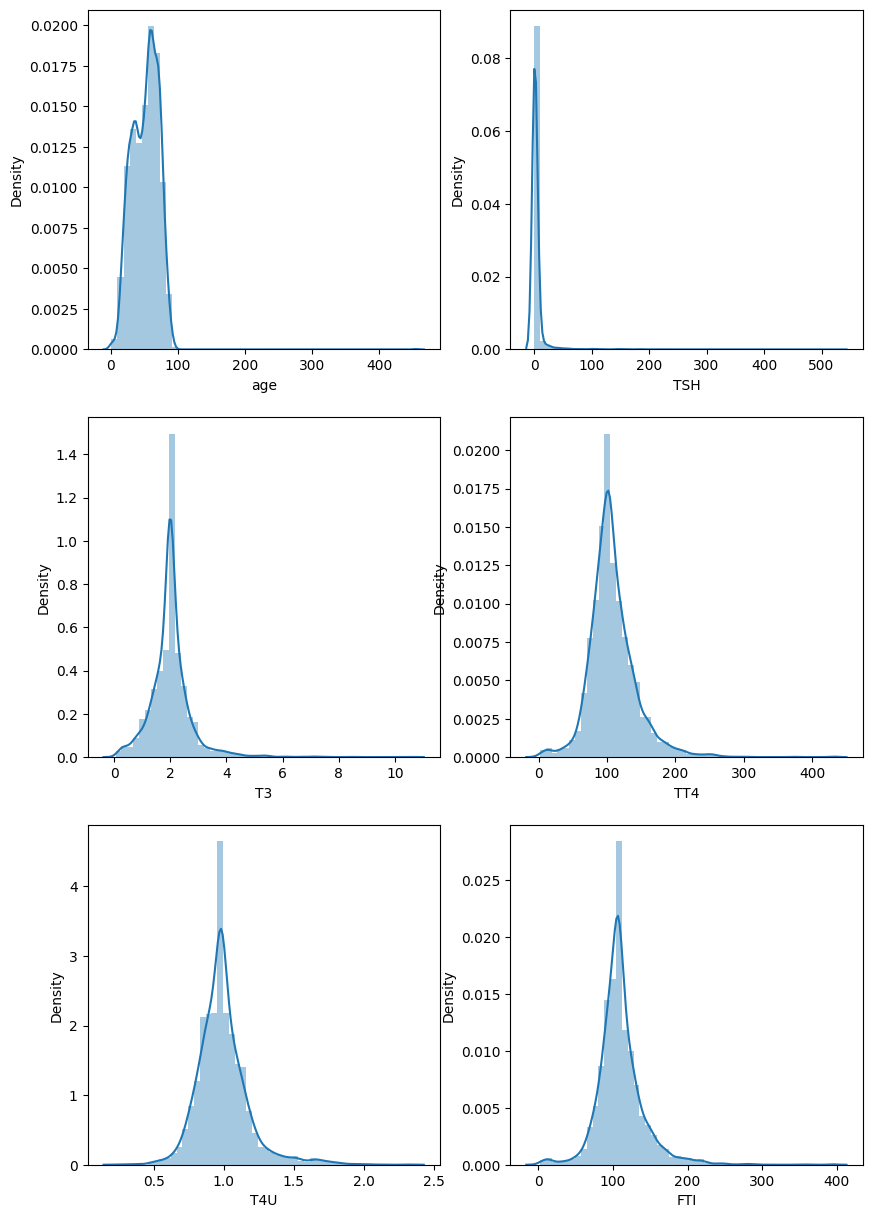

In [271]:
# Let's check the distribution for our continuous data in the dataset.
columns = ['age','TSH','T3','TT4','T4U','FTI']
plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1
for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [272]:
X = df.drop(['Class'], 1)
Y = df['Class']
cols = np.array(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_M', 'sick_t', 'pregnant_t', 'thyroid_surgery_t', 'goitre_t', 'tumor_t'])
li = []

In [273]:
#PCA
from sklearn.decomposition import PCA
print('PCA:')
pca = PCA(n_components =  5)
fits = pca.fit(X)
#Summarize components
print('Explained Variance:', end = ' ')
for val in fits.explained_variance_ratio_:
    print('%.3f' % val, end = ' ')
print('\nfit components:', fits.components_)

PCA:
Explained Variance: 0.640 0.158 0.129 0.072 0.000 
fit components: [[ 5.42234461e-03 -2.00497761e-01  7.31444817e-03  7.31989283e-01
   6.41186272e-04  6.51081939e-01 -1.10948592e-03 -1.21725495e-04
   2.43440737e-04 -7.64482146e-05 -5.84866550e-05  1.36902824e-04]
 [-2.98036590e-01  9.26635289e-01  3.54839328e-03  2.26762246e-01
   2.12652625e-03  3.28488028e-02 -1.88256107e-03 -4.90948657e-04
   3.81323674e-04  1.40594096e-04 -3.66748812e-05  8.18600603e-05]
 [ 9.29305807e-01  3.12359254e-01 -8.72706871e-03 -8.08543840e-02
  -2.08575663e-03  1.79452549e-01 -1.50966942e-06  6.30013668e-04
  -8.26095610e-04 -1.35746338e-04 -2.90545025e-04 -2.65522376e-04]
 [-2.17918496e-01  5.97922362e-02 -1.08706711e-02 -6.37148859e-01
  -1.03535314e-02  7.36694757e-01  5.39325093e-03 -3.53186074e-05
  -1.92804326e-03 -5.43255958e-05 -1.19497062e-04 -6.27835389e-04]
 [ 6.80892173e-03  1.60897575e-03  9.97164773e-01 -1.36953101e-02
   2.60026929e-02  4.70277114e-03  6.25887324e-02 -1.81199338e-02


In [274]:
#Now let's consider the features selected by PCA first
X = pca.fit_transform(X)
X

array([[ 1.23549435e+01,  3.84751220e+00, -1.26274487e+01,
        -9.53100726e+00,  1.56109957e-01],
       [-6.44572963e+00,  6.52340593e+00, -2.69749043e+01,
         7.74707008e+00, -1.59101730e-01],
       [ 7.89137312e+00, -1.21019900e+00, -4.80838471e+00,
         7.67150071e+00,  1.85208631e-02],
       ...,
       [-3.53364048e-01, -5.54841830e+00,  1.95661598e+01,
        -1.11506168e+01, -1.53689102e-01],
       [-3.31609019e+01, -1.64251356e+01,  1.55271774e+01,
        -5.11934039e+00,  4.10464320e-01],
       [-1.75625468e+01, -9.74078136e+00,  7.70716184e+00,
        -1.05150249e+01,  2.87393796e-01]])

In [275]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
df['Class']=lblEn.fit_transform(df['Class'])

<Axes: ylabel='count'>

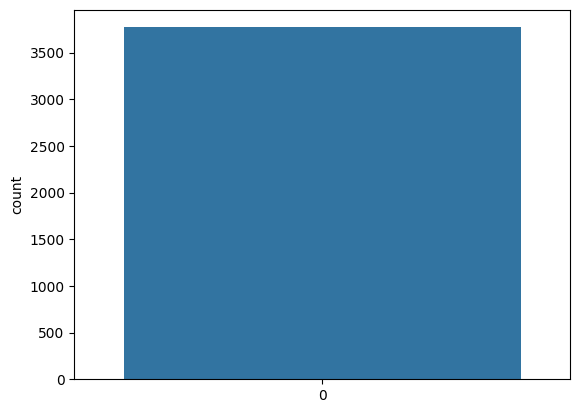

In [276]:
#Now we make a count plot for the classes in the dataset
sns.countplot(df['Class'])

In [277]:
n = len(df)
print('Total size of the dataset', n)
n1 = len(data[data['Class'] == 'primary_hypothyroid'])
print('No of primary hypothyroid in Dataset:', n1)
n2 = len(data[data['Class'] == 'compensated_hypothyroid'])
print("No of compensated hypothyroid in Dataset:",n2)
n3 = len(data[data['Class'] == 'negative'])
print("No of negative in Dataset:",n3)
n3 = len(data[data['Class'] == 'negative'])

Total size of the dataset 3772
No of primary hypothyroid in Dataset: 95
No of compensated hypothyroid in Dataset: 194
No of negative in Dataset: 3481


Total number of samples: 10445
No of primary hypothyroid samples after oversampling: 3481
No of compensated hypothyroid samples after oversampling: 3481
No of negative samples after oversampling: 3481


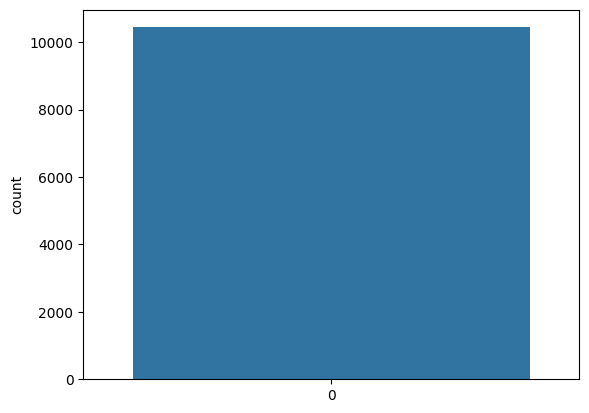

In [278]:
#As we can see that the dataset is highly imbalanced, we will perfrom SMOTE on the dataset
from imblearn.over_sampling import BorderlineSMOTE
Y = df['Class']
sm = BorderlineSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, Y)
sns.countplot(y_res)
print('Total number of samples:',len(y_res))
series = y_res.value_counts()
n1 = series[2]
print('No of primary hypothyroid samples after oversampling:', n1)
n2 = series[0]
print('No of compensated hypothyroid samples after oversampling:', n2)
n3 = series[1]
print('No of negative samples after oversampling:', n3)

In [279]:
#Now let's build our models for the oversampled data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res, y_res, test_size = 0.3, random_state = 0)

In [280]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
print('Decision Tree:')
model_dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)
print('Train score: %.3f' % (model_dtc.score(X_train, y_train) * 100))
print('Test score: %.3f' %  (model_dtc.score(X_test, y_test) * 100))
print('Accuracy score: %.3f' % (accuracy_score(y_test, y_pred) * 100))
print('Precision score: %.3f' % (precision_score(y_true = y_test, y_pred = y_pred, average = 'macro') * 100))
print('Recall score: %.3f' % (recall_score(y_true = y_test, y_pred = y_pred, average = 'macro') * 100))
print('F1 score: %.3f' % (f1_score(y_true = y_test, y_pred = y_pred, average = 'macro') * 100))

Decision Tree:
Confusion matrix:
 [[1032   27    6    0]
 [  34  978    3    0]
 [   5    1 1047    0]
 [   0    1    0    0]]
Train score: 100.000
Test score: 97.543
Accuracy score: 97.543
Precision score: 73.157
Recall score: 73.172
F1 score: 73.163


In [281]:
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1065
           1       0.97      0.96      0.97      1015
           2       0.99      0.99      0.99      1053
           3       0.00      0.00      0.00         1

    accuracy                           0.98      3134
   macro avg       0.73      0.73      0.73      3134
weighted avg       0.98      0.98      0.98      3134



In [282]:
#Making a heat map
cm_matrix = pd.DataFrame(data=cm, columns=['Negative:1', 'Compensated Hypothyroid:0', 'Primary Hypothyroid:2'], index=['Predicted Negative:1', 'Compensated Hypothyroid:0', 'Primary Hypothyroid:2'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

ValueError: Shape of passed values is (4, 4), indices imply (3, 3)

In [ ]:
#Now we go for cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = model_dtc, X = X_res, y = y_res, cv = 5)
print('Accuracies after cross validation:', accuracies)
print('Mean:', accuracies.mean())

Accuracies after cross validation: [0.94973672 0.9775012  0.9765438  0.98132184 0.97940613]
Mean: 0.9729019366174579


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
print('Random Forest:')
model_rf = RandomForestClassifier(criterion = 'entropy', random_state = 0)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)
print('Train score: %.3f' % (model_rf.score(X_train, y_train) * 100))
print('Test score: %.3f' %  (model_rf.score(X_test, y_test) * 100))
print('Accuracy score: %.3f' % (accuracy_score(y_test, y_pred) * 100))
print('Precision score: %.3f' % (precision_score(y_true = y_test, y_pred = y_pred, average = 'macro') * 100))
print('Recall score: %.3f' % (recall_score(y_true = y_test, y_pred = y_pred, average = 'macro') * 100))
print('F1 score: %.3f' % (f1_score(y_true = y_test, y_pred = y_pred, average = 'macro') * 100))

Random Forest:
Confusion matrix:
 [[1065    6    3]
 [  12 1002    3]
 [   3    0 1039]]
Train score: 100.000
Test score: 99.138
Accuracy score: 99.138
Precision score: 99.147
Recall score: 99.133
F1 score: 99.139


In [ ]:
print('Classification report:\n', classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1074
           1       0.99      0.99      0.99      1017
           2       0.99      1.00      1.00      1042

    accuracy                           0.99      3133
   macro avg       0.99      0.99      0.99      3133
weighted avg       0.99      0.99      0.99      3133



<AxesSubplot:>

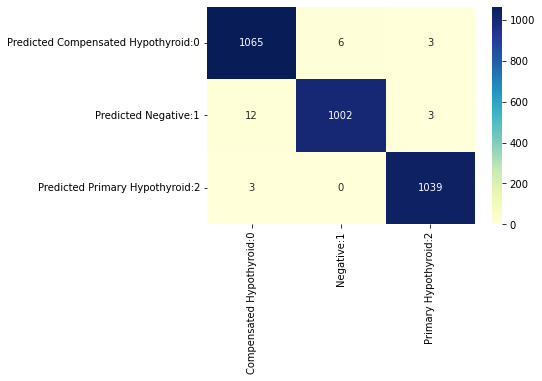

In [ ]:
#Making a heat map
cm_matrix = pd.DataFrame(data=cm, columns=['Compensated Hypothyroid:0', 'Negative:1', 'Primary Hypothyroid:2'], index=['Predicted Compensated Hypothyroid:0', 'Predicted Negative:1', 'Predicted Primary Hypothyroid:2'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [ ]:
#Now we go for cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = model_rf, X = X_res, y = y_res, cv = 5)
print('Accuracies after cross validation:', accuracies)
print('Mean: %.3f' % (accuracies.mean() * 100))

Accuracies after cross validation: [0.97319292 0.99186213 0.98803255 0.99377395 0.99137931]
Mean: 98.765


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout
from keras import Sequential
from keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_res= sc.fit_transform(X_res)
X_res

array([[ 0.99606439,  0.07908738, -0.82751206, -0.5123005 ,  0.39737815],
       [ 0.55820531,  0.22440852, -1.61063343,  0.56158779, -0.20431772],
       [ 0.89226869, -0.19277412, -0.40047582,  0.55644806,  0.13556311],
       ...,
       [-1.22791747,  0.86108544,  1.3873332 , -0.21682899, -0.2616046 ],
       [-1.02599432,  0.07753234,  0.79494247, -0.15520536, -0.50491919],
       [-1.45232729,  0.27722989,  1.28462658,  0.92769603, -1.02626485]])

In [ ]:
tf.random.set_seed(3)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 0)

In [ ]:
#ANN
ann = Sequential([
  Dense(32, activation = 'relu'),
  Dropout(0.3),
  Dense(16, activation = 'relu'),
  Dense(3, activation = 'softmax')                          
])

ann.compile(
    optimizer = 'adam',
    loss = SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
ann.fit(X_train, y_train, epochs = 50, batch_size = 10)

Epoch 1/50
731/731 [==============================] - 4s 1ms/step - loss: 0.6446 - accuracy: 0.7200
Epoch 2/50
731/731 [==============================] - 1s 1ms/step - loss: 0.2940 - accuracy: 0.9019
Epoch 3/50
731/731 [==============================] - 1s 1ms/step - loss: 0.1863 - accuracy: 0.9464
Epoch 4/50
731/731 [==============================] - 1s 1ms/step - loss: 0.1461 - accuracy: 0.9587
Epoch 5/50
731/731 [==============================] - 1s 1ms/step - loss: 0.1201 - accuracy: 0.9666
Epoch 6/50
731/731 [==============================] - 1s 1ms/step - loss: 0.1117 - accuracy: 0.9687
Epoch 7/50
731/731 [==============================] - 1s 1ms/step - loss: 0.1032 - accuracy: 0.9718
Epoch 8/50
731/731 [==============================] - 1s 1ms/step - loss: 0.0943 - accuracy: 0.9740
Epoch 9/50
731/731 [==============================] - 1s 1ms/step - loss: 0.0889 - accuracy: 0.9754
Epoch 10/50
731/731 [==============================] - 1s 1ms/step - loss: 0.0850 - accuracy: 0.9767

In [ ]:
y_pred = ann.predict(X_test)
ann.evaluate(X_test, y_test)
cat_pred = [np.argmax(ele) for ele in y_pred]
print('Classification report:\n', classification_report(y_test, cat_pred))

98/98 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9920
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1074
           1       1.00      0.99      0.99      1017
           2       0.99      1.00      0.99      1042

    accuracy                           0.99      3133
   macro avg       0.99      0.99      0.99      3133
weighted avg       0.99      0.99      0.99      3133



Confusion matrix:
 tf.Tensor(
[[1069    2    3]
 [  12 1002    3]
 [   5    0 1037]], shape=(3, 3), dtype=int32)


<AxesSubplot:>

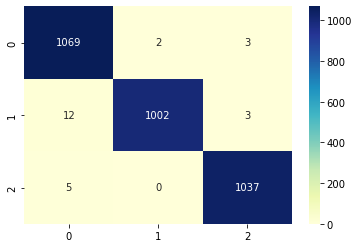

In [ ]:
#Making a heat map
from tensorflow.math import confusion_matrix
cm = confusion_matrix(y_test, cat_pred)
print('Confusion matrix:\n', cm)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [ ]:
def keras_model():
    model = Sequential()
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(3, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
    return model

In [ ]:
ann_model = KerasClassifier(build_fn = keras_model, epochs = 50, batch_size = 10)
acc = cross_val_score(estimator = ann_model, X = X_train, y = y_train, cv = 5)

Epoch 1/50
585/585 [==============================] - 2s 1ms/step - loss: 0.6212 - accuracy: 0.7440
Epoch 2/50
585/585 [==============================] - 1s 1ms/step - loss: 0.3151 - accuracy: 0.8972
Epoch 3/50
585/585 [==============================] - 1s 1ms/step - loss: 0.2148 - accuracy: 0.9400
Epoch 4/50
585/585 [==============================] - 1s 1ms/step - loss: 0.1668 - accuracy: 0.9535
Epoch 5/50
585/585 [==============================] - 1s 1ms/step - loss: 0.1492 - accuracy: 0.9569
Epoch 6/50
585/585 [==============================] - 1s 1ms/step - loss: 0.1323 - accuracy: 0.9644
Epoch 7/50
585/585 [==============================] - 1s 1ms/step - loss: 0.1219 - accuracy: 0.9656
Epoch 8/50
585/585 [==============================] - 1s 2ms/step - loss: 0.1115 - accuracy: 0.9682
Epoch 9/50
585/585 [==============================] - 1s 2ms/step - loss: 0.1052 - accuracy: 0.9702
Epoch 10/50
585/585 [==============================] - 1s 1ms/step - loss: 0.1030 - accuracy: 0.9702

585/585 [==============================] - 1s 1ms/step - loss: 0.0674 - accuracy: 0.9832
Epoch 32/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0683 - accuracy: 0.9815
Epoch 33/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0600 - accuracy: 0.9827
Epoch 34/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0669 - accuracy: 0.9827
Epoch 35/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0629 - accuracy: 0.9832
Epoch 36/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0647 - accuracy: 0.9838
Epoch 37/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0633 - accuracy: 0.9820
Epoch 38/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0632 - accuracy: 0.9827
Epoch 39/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0588 - accuracy: 0.9853
Epoch 40/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0626 - accuracy: 0.9829
Ep

585/585 [==============================] - 1s 1ms/step - loss: 0.1033 - accuracy: 0.9708
Epoch 11/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0968 - accuracy: 0.9716
Epoch 12/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0893 - accuracy: 0.9744
Epoch 13/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0913 - accuracy: 0.9761
Epoch 14/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0855 - accuracy: 0.9762
Epoch 15/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9776
Epoch 16/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0783 - accuracy: 0.9793
Epoch 17/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0804 - accuracy: 0.9788
Epoch 18/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0798 - accuracy: 0.9781
Epoch 19/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0729 - accuracy: 0.9800
Ep

585/585 [==============================] - 1s 1ms/step - loss: 0.0497 - accuracy: 0.9850
Epoch 41/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0525 - accuracy: 0.9858
Epoch 42/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0526 - accuracy: 0.9863
Epoch 43/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0514 - accuracy: 0.9860
Epoch 44/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0525 - accuracy: 0.9867
Epoch 45/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0498 - accuracy: 0.9867
Epoch 46/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0516 - accuracy: 0.9865
Epoch 47/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0489 - accuracy: 0.9867
Epoch 48/50
585/585 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9873
Epoch 49/50
585/585 [==============================] - 1s 1ms/step - loss: 0.0481 - accuracy: 0.9870
Ep

In [ ]:
print('Accuracies after cross validation:', acc)
print('Mean:', acc.mean())

Accuracies after cross validation: [0.9870041  0.98837209 0.98905611 0.98768812 0.98016417]
Mean: 0.9864569187164307


In [ ]:
import pickle
pickle.dump(model_rf, open('model.pkl', 'wb'))
pickle.dump(pca, open('pca.pkl', 'wb'))

In [ ]:
X1 = df.drop(['Class'], axis = 1)
print(X1.iloc[1704])

age                   52
TSH                   35
T3                   2.1
TT4                   77
T4U                  1.1
FTI                   70
sex_M                  0
sick_t                 0
pregnant_t             0
thyroid_surgery_t      0
goitre_t               0
tumor_t                0
Name: 1704, dtype: object
